#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Aprendizado de Máquina - 2021/1**

* **Trabalho 02**
* **Professor**: Eduardo Bezerra
* **Aluno**: Janio de Souza Lima

##Preparação do ambiente

Importação de bibliotecas

In [ ]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.optimize as opt

Carga de arquivos para ambiente (apenas para uso deste notebook no Google Colab)

In [ ]:
from google.colab import drive

In [ ]:
#Conecta o Google Colab ao Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


A etapa anterior apenas conecta ao seu Google Drive, após rodá-la e autenticar a sessão usando o link da API da Google, o código abaixo deve ser executado para apontar para o diretório de trabalho no qual estão gravados os códigos e bibliotecas personalziadas que serão usados na análise.

Os códigos* em questão estão disponíveis em: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1/code

** Em alguns casos foi necessário adaptar partes das funções originais disponíveis no repositório citado ou substituí-las por versões que estão escritas nas próprias células deste notebook*

A pasta com os dados deve ser gravada neste mesmo diretório com o nome *data*, assim os trechos nos quais os conjuntos de dados são carregados rodarão sem problemas.

In [ ]:
#Define o path dos códigos e dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/t2'
os.chdir(dir)

In [ ]:
#Bibliotecas/módulos utilitários personalizados
from util.read_dataset import read_dataset

#1 Aprendizado Supervisionado Revisitado

##1.1 Aprendizado com Regressores

###1.1.1 Regressão com uma variável

Análise preliminar dos dados

In [ ]:
#Carga dos dados usando as bibliotecas pandas e numpy
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Population', 'Profit'])

#Convertendo os dados para numpy array
X = np.array(dados.Population)
X = X.reshape(-1, 1)
y = np.array(dados.Profit)

dados.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
#Informações gerais do dataset carregado
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
#Sumário estatístico dos dados
dados.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


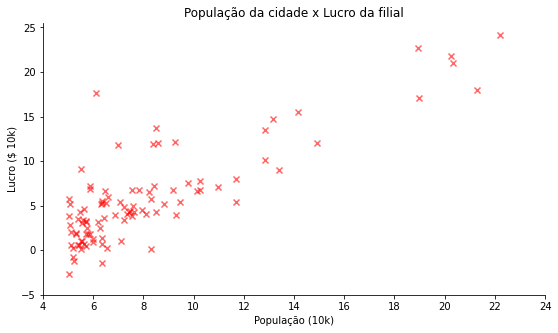

In [ ]:
#Geração do gráfico de dispersão
plt.figure(figsize=(9,5))
plt.scatter(dados.Population,
            dados.Profit,
            marker='x',
            color='red',
            alpha=0.6)

plt.xticks([4,6,8,10,12,14,16,18,20,22,24])
plt.yticks([-5,0,5,10,15,20,25])

plt.title('População da cidade x Lucro da filial')
plt.xlabel('População (10k)')
plt.ylabel('Lucro ($ 10k)')

plt.savefig('target/plot1.1.1.png')

sns.despine()

Criação de modelos de regressão baseados nos algoritmos ***k-NN*** e ***Decision Trees***.

####Aplicação básica do **k-NN** sem sintonização de hiperparâmetros.

---

Na geração do modelo ***k-NN*** abaixo foi definido, de forma arbitrária, o parâmetro `n_neighbors`.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
#Criação do objeto com os parâmetros do modelo
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

In [ ]:
#Treinamento do modelo
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([19.18341697,  2.09002643,  1.81531929,  3.52056822,  0.45514218,
        7.28814371, 22.33804637,  8.04648035,  1.90584025,  2.64326988,
        4.25026806,  4.50127752,  2.68126569, 10.15035769,  4.93402555,
        4.53103741,  2.0256771 ,  1.32693927,  3.43575169,  4.85189867])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#Avaliação do modelo
rmse_knn = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_knn)

3.9782475830030886


####Aplicação básica do algoritmo **Decision Trees** sem sintonização de hiperparâmetros.

---

Na geração do modelo da árvore de decisão abaixo foi definido, de forma arbitrária, o parâmetro `max_depth` para limitar a profundidade da árvore e reduzir a possibilidade de sobreajustamento.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Criação e treinamento do modelo
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

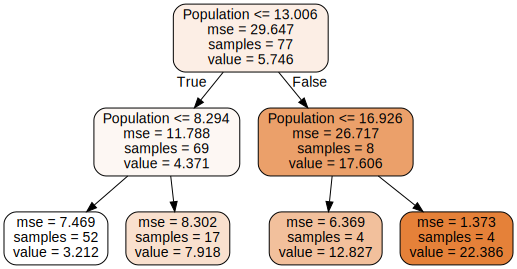

In [ ]:
export_graphviz(
        tree_reg,
        out_file='reg_tree.dot',
        feature_names=['Population'],
        class_names=['Profit'],
        rounded=True,
        filled=True
    )

Source.from_file('reg_tree.dot')

In [ ]:
#Converter arquivo .dot em .png
!dot -Tpng reg_tree.dot -o target/reg_tree.png

In [ ]:
y_pred = tree_reg.predict(X_test)

In [ ]:
y_pred

array([22.386     ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,
        7.91843529, 22.386     ,  7.91843529,  3.211595  ,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  7.91843529,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ])

In [ ]:
#Avaliação do modelo
rmse_dtree = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_dtree)

4.215675881663337


In [ ]:
#print(f'RMSE k-NN: {rmse_knn:.3f}\nRMSE Decition Tree: {rmse_dtree:.3f}')
print('RMSE dos modelos\n\nk-NN               | Decision Tree')
print('-'*40)
print(rmse_knn, rmse_dtree, sep=' | ')

RMSE dos modelos

k-NN               | Decision Tree
----------------------------------------
3.9782475830030886 | 4.215675881663337


Como os modelos anteriores foram treinados utilizando parâmetros definidios de maneira harbitrária, mesmo que seja possível compará-los usando a métrica escolhida (RMSE), não é possível afirmar que eles já apresentam os melhores resultados que cada algoritmo seria capaz de apresentar para este conjunto de dados.

Para buscar resultados mais otimizados que auxiliem na escolha do algoritmo e do modelo, utilizaremos a sintonização de hiperparâmetros usando validação cruzada e testes de valores aleatórios dos hiperparâmetros. Para essa implementação será usada a função `RandomizedSearchCV` da bibliotca Scikit-Learn.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Aplicação do algoritmo ***k-NN*** com sintonização de hiperparâmetros.

---

Para seleção do modelo ***k-NN*** abaixo foram realizados testes com valores diferentes para o parâmetro `n_neighbors`.

In [ ]:
#Criação do objeto sem o parâmetro que será analisado
knn = KNeighborsRegressor(weights = 'distance')

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'n_neighbors': [5, 10, 15, 20, 25, 30]}

In [ ]:
randomGrd_search = RandomizedSearchCV(knn,
                                      param,
                                      n_iter=20,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

In [ ]:
randomGrd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='distance'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3.421699000444819 {'n_neighbors': 5}
3.4375151995051834 {'n_neighbors': 10}
3.502240429800021 {'n_neighbors': 15}
3.5857621897655014 {'n_neighbors': 20}
3.6579755754920162 {'n_neighbors': 25}
3.738083076740441 {'n_neighbors': 30}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'n_neighbors': 5}

In [ ]:
best_rmse_knn = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_knn:.3f}')

RMSE Melhor modelo: 3.422


Criação do modelo baseado no melhor resultado da selação de hiperparâmetros.

In [ ]:
#Recuperação do modelo treinado
best_knn = randomGrd_search.best_estimator_

In [ ]:
#Aplicação do modelo treinado nos dados de teste
final_pred = best_knn.predict(X_test)
final_pred

array([21.92758308,  1.80275007,  1.7051642 ,  3.51739838, -0.13539576,
        6.06857021, 22.5835162 ,  8.03758736,  1.74865393,  2.35961441,
        4.31765663,  4.71402868,  2.77345774, 10.2193069 ,  4.81380551,
        5.07143949,  1.89242745,  0.98349951,  3.73561435,  4.65381532])

In [ ]:
#Avaliação do modelo
final_mse_knn = mean_squared_error(y_test, final_pred)
final_rmse_knn = np.sqrt(final_mse_knn)
final_rmse_knn

4.155912760314783

####Aplicação do algoritmo ***Decision Trees*** com sintonização de hiperparâmetros.

---

Para seleção do modelo abaixo foram realizados testes com valores diferentes para os parâmetros `max_depth` que define a profundidade da árvore e `criterion`.

In [ ]:
#help(DecisionTreeRegressor)

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
param = {'max_depth': [2, 3, 4, None],
         'criterion': ['mse', 'friedman_mse', 'mae']}

In [ ]:
randomGrd_search = RandomizedSearchCV(dtree,
                                      param,
                                      n_iter=20,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

In [ ]:
randomGrd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

Abaixo são exisbidos os resultados para as combinações de parâmetros. Em seguida são exibidos os parâmetros e a avaliação do melhor modelo encontrado.

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3.1785438718568404 {'max_depth': 2, 'criterion': 'mse'}
3.289172585528215 {'max_depth': 3, 'criterion': 'mse'}
3.2522741967508164 {'max_depth': 4, 'criterion': 'mse'}
4.1125717238964254 {'max_depth': None, 'criterion': 'mse'}
3.1785438718568404 {'max_depth': 2, 'criterion': 'friedman_mse'}
3.289172585528215 {'max_depth': 3, 'criterion': 'friedman_mse'}
3.2522741967508164 {'max_depth': 4, 'criterion': 'friedman_mse'}
4.1125717238964254 {'max_depth': None, 'criterion': 'friedman_mse'}
3.3392085336981676 {'max_depth': 2, 'criterion': 'mae'}
3.2540882640699964 {'max_depth': 3, 'criterion': 'mae'}
3.632254573071467 {'max_depth': 4, 'criterion': 'mae'}
4.112562991735497 {'max_depth': None, 'criterion': 'mae'}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'criterion': 'mse', 'max_depth': 2}

In [ ]:
best_rmse_tree = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_tree:.3f}')

RMSE Melhor modelo: 3.179


Criação de um modelo com base nos melhores parâmetros.

In [ ]:
#Recuperação do modelo treinado
best_tree = randomGrd_search.best_estimator_

In [ ]:
#Aplicação do modelo treinado nos dados de teste
final_pred = best_tree.predict(X_test)
final_pred

array([22.386     ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,
        7.91843529, 22.386     ,  7.91843529,  3.211595  ,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  7.91843529,  3.211595  ,
        3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ,  3.211595  ])

In [ ]:
#Avaliação do modelo
final_mse_dtree = mean_squared_error(y_test, final_pred)
final_rmse_dtree = np.sqrt(final_mse_dtree)
final_rmse_dtree

4.215675881663337

**Comparação dos resultados finais**

In [ ]:
print('RMSE dos modelos selecionados\n\nAnálise      | k-NN              | Decision Tree')
print('-'*55)
print('Val. Cruzada', best_rmse_knn, best_rmse_tree, sep=' | ')
print('Teste       ', final_rmse_knn, final_rmse_dtree, sep=' | ')

RMSE dos modelos selecionados

Análise      | k-NN              | Decision Tree
-------------------------------------------------------
Val. Cruzada | 3.421699000444819 | 3.1785438718568404
Teste        | 4.155912760314783 | 4.215675881663337


###1.1.2 Regressão com múltiplas variáveis

Análise preliminar dos dados

In [ ]:
#Carga dos dados usando as bibliotecas pandas e numpy
#arquivo = 'data/ex1data2.txt'
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data2.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Tamanho', 'Dormitorios', 'Preco'])

dados.head()

,Tamanho,Dormitorios,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Tamanho      47 non-null     int64
 1   Dormitorios  47 non-null     int64
 2   Preco        47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [ ]:
dados.describe()

,Tamanho,Dormitorios,Preco
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Conforme análise das características do conjunto de dados, temos "Tamanho" na escala de 852 a 4478, enquanto "Dormitórios" apresenta escala de 1 a 5. Para geração de modelos usando estas características realizamos a padronização das esclas usando a função `StandardScaler` que gera novas características com base na subtração da média dos valores originais e em seguida pela divisão desta subtração pela da variância dos valores.

In [ ]:
#Organização dos dados em váveis separadas
X, y = read_dataset(arquivo)

In [ ]:
X[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [ ]:
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_norm = StandardScaler()

In [ ]:
X_train_norm = std_norm.fit_transform(X_train)

Exibição dos primeiros registros das características normalizadas.

In [ ]:
X_train_norm[:5]

array([[-0.77562586, -0.16666667],
       [-0.72751943, -1.4       ],
       [-0.56983725, -0.16666667],
       [-0.3961196 , -1.4       ],
       [ 1.57223508, -0.16666667]])

####Aplicação do algoritmo ***k-NN*** para múltiplas variáveis com sintonização de hiperparâmetros.

---

Para seleção do modelo ***k-NN*** abaixo foram realizados testes com valores diferentes para o parâmetro `n_neighbors`.

In [ ]:
#Criação do objeto sem o parâmetro que será analisado
knn_multi = KNeighborsRegressor(weights = 'distance')

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
folds = 10
iter = 20

In [ ]:
#Seleção do modelo
randomGrd_search = RandomizedSearchCV(knn_multi,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error')

In [ ]:
randomGrd_search.fit(X_train_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='distance'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

89173.06023867214 {'n_neighbors': 5}
93454.50479832542 {'n_neighbors': 10}
95139.19854183818 {'n_neighbors': 15}
98240.57896269095 {'n_neighbors': 20}
101649.78472920597 {'n_neighbors': 25}
103559.9205182651 {'n_neighbors': 30}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'n_neighbors': 5}

In [ ]:
best_rmse_knn_multi = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_knn_multi:.3f}')

RMSE Melhor modelo: 89173.060


In [ ]:
best_knn_multi = randomGrd_search.best_estimator_

In [ ]:
X_test_norm = std_norm.transform(X_test)

In [ ]:
X_test_norm

array([[ 0.7557621 , -0.16666667],
       [ 0.26935266,  1.06666667],
       [-0.67139527, -0.16666667],
       [-1.016158  , -0.16666667],
       [ 2.5784612 , -0.16666667],
       [-0.9640427 , -0.16666667],
       [-0.09411813, -0.16666667],
       [ 1.43058838,  1.06666667],
       [ 1.3891634 ,  1.06666667],
       [-1.14978697, -0.16666667]])

In [ ]:
y_pred = best_knn_multi.predict(X_test_norm)
y_pred

array([[355079.60585198],
       [342191.83142914],
       [238838.70312658],
       [236567.75201609],
       [479465.38956135],
       [207865.55639361],
       [314377.27434853],
       [431224.78985145],
       [430267.63439037],
       [226282.35596918]])

In [ ]:
#Avaliação do modelo
final_mse_knn_multi = mean_squared_error(y_test, y_pred)
final_rmse_knn_multi = np.sqrt(final_mse_knn_multi)
final_rmse_knn_multi

110098.96523558114

####Aplicação do algoritmo ***Decision Trees*** para múltiplas variáveis com sintonização de hiperparâmetros.

---

Para seleção do modelo abaixo foram realizados testes com valores diferentes para os parâmetros `max_depth` que define a profundidade da árvore e `criterion`.

In [ ]:
#Criação do objeto para treinamento seleção do modelo
dtree_multi = DecisionTreeRegressor()

In [ ]:
param = {'max_depth': [2, 3, 4, None],
         'criterion': ['mse', 'friedman_mse', 'mae']}
folds = 10
iter = 20

In [ ]:
randomGrd_search = RandomizedSearchCV(dtree_multi,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error')

In [ ]:
#Aplicação do randomized grid search para seleção do modelo
randomGrd_search.fit(X_train_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

90019.82674720637 {'max_depth': 2, 'criterion': 'mse'}
87988.09272010982 {'max_depth': 3, 'criterion': 'mse'}
99996.2289004372 {'max_depth': 4, 'criterion': 'mse'}
105213.94755675219 {'max_depth': None, 'criterion': 'mse'}
90019.82674720637 {'max_depth': 2, 'criterion': 'friedman_mse'}
87988.09272010982 {'max_depth': 3, 'criterion': 'friedman_mse'}
99068.38723762585 {'max_depth': 4, 'criterion': 'friedman_mse'}
102089.3230973494 {'max_depth': None, 'criterion': 'friedman_mse'}
93773.17343920027 {'max_depth': 2, 'criterion': 'mae'}
95149.49149167849 {'max_depth': 3, 'criterion': 'mae'}
103560.39465979101 {'max_depth': 4, 'criterion': 'mae'}
108859.62678517842 {'max_depth': None, 'criterion': 'mae'}


In [ ]:
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'criterion': 'mse', 'max_depth': 3}

In [ ]:
best_rmse_dtree_multi = np.sqrt(-randomGrd_search.best_score_)
print(f'RMSE Melhor modelo: {best_rmse_dtree_multi:.3f}')

RMSE Melhor modelo: 87988.093


In [ ]:
#Recuperação do modelo treinado
best_tree_multi = randomGrd_search.best_estimator_

In [ ]:
#Aplicação do modelo treinado nos dados de teste
y_pred = best_tree_multi.predict(X_test_norm)
y_pred

array([384459.8       , 384459.8       , 225854.45454545, 225854.45454545,
       579900.        , 225854.45454545, 291633.25      , 549000.        ,
       549000.        , 225854.45454545])

In [ ]:
#Avaliação do modelo
final_mse_dtree_multi = mean_squared_error(y_test, y_pred)
final_rmse_dtree_multi = np.sqrt(final_mse_dtree_multi)
final_rmse_dtree_multi

91450.92710547794

In [ ]:
print('RMSE dos modelos selecionados\n\nAnálise      | k-NN              | Decision Tree')
print('-'*55)
print('Val. Cruzada', best_rmse_knn_multi, best_rmse_dtree_multi, sep=' | ')
print('Teste       ', final_rmse_knn_multi, final_rmse_dtree_multi, sep=' | ')

RMSE dos modelos selecionados

Análise      | k-NN              | Decision Tree
-------------------------------------------------------
Val. Cruzada | 89173.06023867214 | 87988.09272010982
Teste        | 110098.96523558114 | 91450.92710547794


##1.2 Aprendizado de Classificadores

Análise preliminar dos dados

In [ ]:
#Carga dos dados usando as bibliotecas pandas e numpy
#arquivo = 'data/ex2data1.txt'
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Prova 1', 'Prova 2', 'Aprovado'])

dados.head()

,Prova 1,Prova 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
dados.describe()

,Prova 1,Prova 2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Prova 1   100 non-null    float64
 1   Prova 2   100 non-null    float64
 2   Aprovado  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
#Organização do conjunto de dados para uso na modelagem
X, y = read_dataset(arquivo)

In [ ]:
print(
    X[:5],
    y[:5],
    sep='\n\n'
)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]

[[0]
 [0]
 [0]
 [1]
 [1]]


###1.2.1 Visualização de dados

Abaixo visualizamos a dispersão entre os valores das notas das provas 1 e 2 e a marcação do resultado esperado de aprovação ou reprovação.

In [ ]:
%run plot_ex2data1.py

<Figure size 432x288 with 0 Axes>

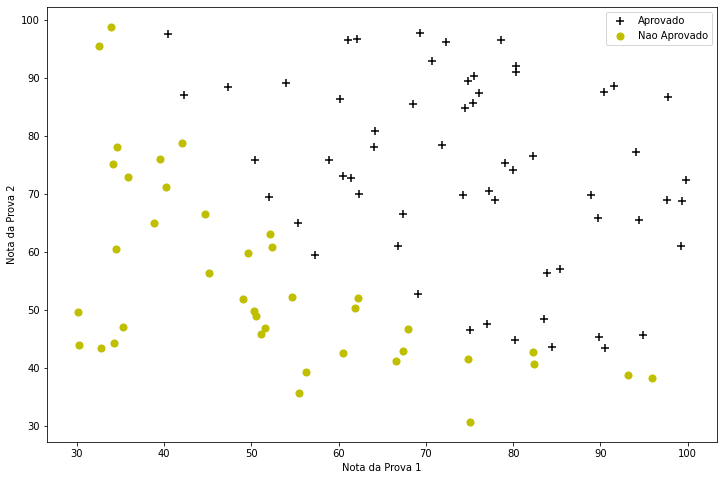

In [ ]:
filename='target/plot1.2.png'
plot(dados, filename)

###1.2.2 Ajuste dos modelos

Nesta seção criaremos modelos de classificação baseados nos algoritmos ***Naive Bayes***, ***Regressão Logística***, ***k-NN*** e ***Decision Tree***.

* Carga das bibliotecas e preparação dos dados para treinamento dos modelos.

In [ ]:
#Importação das classes para geração dos modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Separação dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

* **Criação e Treinamento dos modelos**

####Ajuste do modelo ***Gaussain Naive Bayes***

Para o modelo *Naive Bayes* usamos a função `GaussianNB` em sua configuração padrão, sem sintonização de hiperparâmetros.

In [ ]:
#Gaussain Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

####Ajuste do modelo ***Regressão Logística***

No caso da regressão logística, tendo em vista uma maior gama de opções de parâmetros na função implementada na biblioteca `Scikit-Learn`, foi realizada a sintonização dos hiperparâmetros relativos à penalidade, ao número máximo de iterações e do algoritmo usado na otimização (`solver`).

In [ ]:
#Criação do modelo para execução do tuning
log_reg_tun = LogisticRegression()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'penalty': ['l1', 'l2', 'none'],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'max_iter': [100, 150, 200]
         }

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(log_reg_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'max_iter': [100, 150, 200],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 's

Ao realizar o tuning para esse modelo uma série de combinações de parâmetros apresentou alertas, por isso, realizamos a análise complementar dos detalhes das saídas na célula abaixo.

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.31622776601683794 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200}
0.6324555320336759 {'solver': 'saga', 'penalty': 'l1', 'max_iter': 150}
0.6324555320336759 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 150}
0.31622776601683794 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100}
0.6324555320336759 {'solver': 'saga', 'penalty': 'none', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 200}
0.6324555320336759 {'solver': 'sag', 'penalty': 'none', 'max_iter': 100}
nan {'solver': 'lbfgs', 'penalty': 'l1', 'max_iter': 100}
0.6324555320336759 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100}
nan {'solver': 'liblinear', 'penalty': 'none', 'max_iter': 150}
nan {'solver': 'liblinear', 'penalty': 'none', 'max_iter': 200}
nan {'solver': 'newton-cg', 'penalty': 'l1', 'max_iter': 100}
0.6324555320336759 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 200}
0.6324555320336759 {'solver': 'sag', 'penalty': 'none', 'max_iter': 150}
0.27386127875258304 {'solver': '

Apesar dos alertas e de algumas opções com resultado nulo (nan) para a métrica de comparação, a maioria das iterações chegou a composições de parâmetros comparáveis, por isso, continuamos com nas seções a seguir com o uso do modelo selecionado.

---

Nas células a seguir realizarmos a exibição dos parâmetros selecionados e em seguida criamos o modelo baseado no *tuning* de parâmetros.

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Modelo sem tuning
#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train.ravel()

#Modelo com tuning
log_reg = randomGrd_search.best_estimator_

####Ajuste do modelo ***k-NN***

Para o modelo ***k-NN*** foi realizada a sintonização de hiperparâmetros de forma similar à seção em que o algoritmo foi usado para regressão, ou seja, buscando analisar um valor adequado para o hiperparâmetro $k$.

In [ ]:
#Criação do modelo sem parâmetros para realizar tuning
knn_clf_tun = KNeighborsClassifier()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'n_neighbors': [5, 10, 15, 20, 25, 30]}

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(knn_clf_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

A sintonização ocorrem sem problemas, exceto pelo alerta relativo ao número de iterações do próprio `RandomizedSearchCV`, mas esta situação foi tratada pela própria função que limitou as iterações ao necessário pela quantidade de opções a serem avaliadas.

---

Nas células a seguir é apresentando o valor indicado para $k$ e em seguia gerado o modelo com base na sintonização executada.

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'n_neighbors': 15}

In [ ]:
#Modelo sem tuning
#k-NN
#k = 3
#knn_clf = KNeighborsClassifier(n_neighbors=k)
#knn_clf.fit(X_train, y_train)

#Modelo com tuning
knn_clf = randomGrd_search.best_estimator_

####Ajuste do modelo ***Decision Tree***

O modelo da árvore de decisão para classificação também foi gerado com a sintonização de hiperparâmetros, buscando um valor adequado da profundidade da árvore.

In [ ]:
#Criação do modelo sem parâmetros para realizar tuning
dtree_clf_tun = DecisionTreeClassifier()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'max_depth': [2, 3, 4, None]
         }

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(dtree_clf_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

Nas células a seguir é apresentando o valor indicado para profunidade da árvore (`max_depth`) e em seguia gerado o modelo.

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'max_depth': None}

In [ ]:
#Modelo sem tuning
#dtree_clf = DecisionTreeClassifier(max_depth=3)
#dtree_clf.fit(X_train, y_train)

#Modelo com tuning
dtree_clf = randomGrd_search.best_estimator_

###1.2.3 Avaliação dos modelos

Carga de métricas da bibliotca Scikit-Learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

####Avaliação do modelo ***Gaussian Naive Bayes***

Com o modelo treinado na seção anterior, realizamos a seguir a predição das classes: $y=1$: Aprovado ou $y=0$: Reprovado

In [ ]:
#Predição com modelo Gaussian Naive Bayes
gnb_pred = gnb_clf.predict(X_test)
gnb_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

Como pode ser visto na matriz de confusão. Os resultados predominantes estão são de verdadeiros positivos (9 ocorrências) e verdadeiros negativos (7 ocorrências). A visualização do mapa de calor da matriz de confusão, facilita esta análise, pela apresentação de concentração de cores mais escuras (maior densidade de valores) nos quadrantes correspondentes ao encontro entre a classe real e a classe prevista. Contudo, ainda há ocorrências em proporção relevante para o tamanho do conjunto de dados classificados como falsos positivos ou falsos negativos.

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Gaussian Naive Bayes'
cm = confusion_matrix(y_test, gnb_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 3 | TP: 9


In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])
cm_reorganizada

array([[9, 3],
       [1, 7]])

In [ ]:
cm_reorganizada.shape

(2, 2)

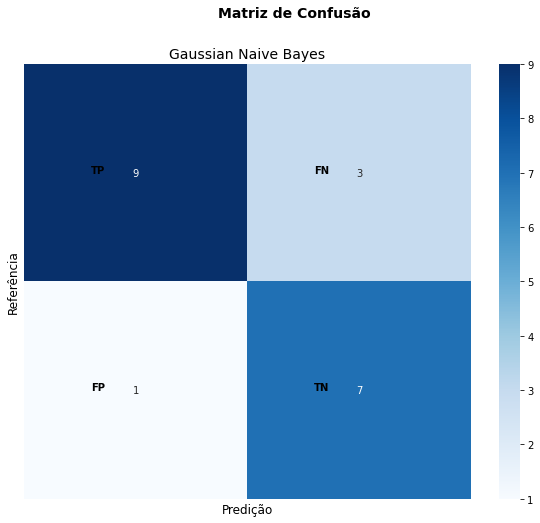

In [ ]:
#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.1.png')

A seguir é apresentado um relatório da classificação com métricas relevantes para o aprofundamento na avaliação do resultado das predições do modelo.

In [ ]:
#Relatório da classificação
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



####Avaliação do modelo ***Regressão Logística***

In [ ]:
#Predição com modelo Regressão Logística
log_reg_pred = log_reg.predict(X_test)
log_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Regressão Logística'
cm = confusion_matrix(y_test, log_reg_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 2 | TP: 10


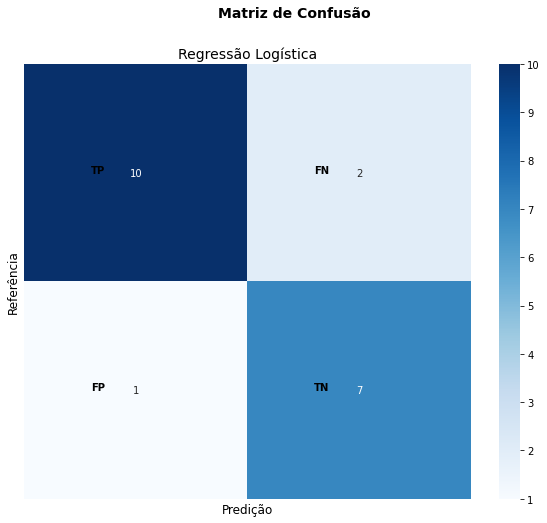

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.2.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



####Avaliação do modelo ***k-NN***

In [ ]:
#Predição com modelo k-NN
knn_clf_pred = knn_clf.predict(X_test)
knn_clf_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'k-NN'
cm = confusion_matrix(y_test, knn_clf_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 2 | TP: 10


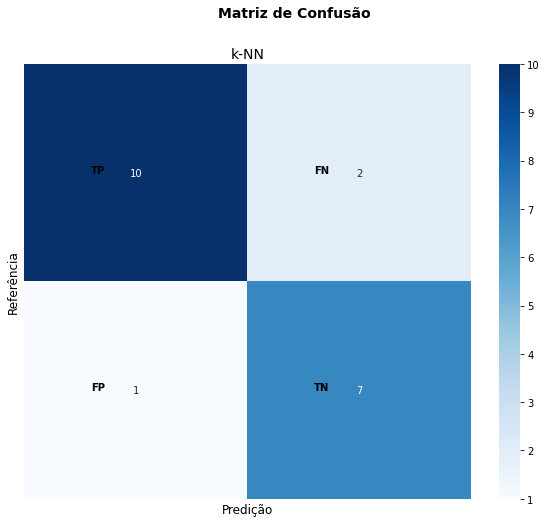

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.3.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, knn_clf_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



####Avaliação do modelo ***Decision Tree***

In [ ]:
#Predição com modelo Decision Tree
dtree_pred = dtree_clf.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Decision Tree'
cm = confusion_matrix(y_test, dtree_pred)

In [ ]:
cm

array([[7, 1],
       [3, 9]])

In [ ]:
cm.shape

(2, 2)

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'Matriz de Confusão:\nTN: {tn} | FP: {fp}\n--------------\nFN: {fn} | TP: {tp}')

Matriz de Confusão:
TN: 7 | FP: 1
--------------
FN: 3 | TP: 9


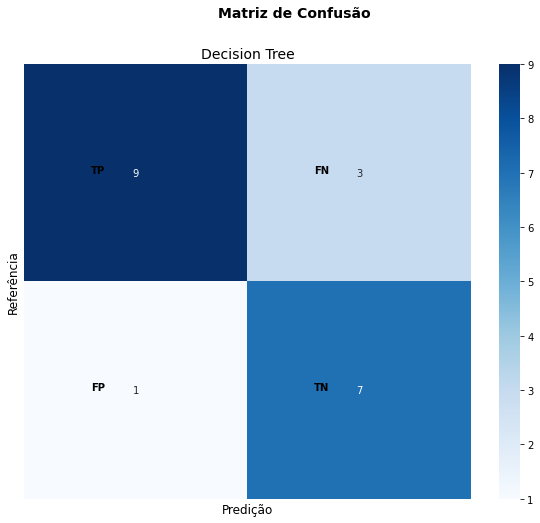

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.3.4.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



###1.2.4 Mapeamento de características

A fim de analisarmos possibilidades de melhoria no modelo de ***Regressão Logística***, experimentaremos a seguir a realização do mapeamento de características. Para isso, será realizada a criação de novas características a partir de polinômios criados com base nos valores originais de $X$ em um espaço dimensional maior.

In [ ]:
#Biblioteca para geração de características polinomiais
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Cria objeto para mapeamento de características
grau = 6
poly = PolynomialFeatures(grau)

In [ ]:
#Aplicação da transformação no conjunto de dados estudado
X_poly = poly.fit_transform(X)


Como pode ser visto nas saídas abaixo o conjunto de dados originais que tinha dimensão $100x2$ agora é representado pelas características mapeadas com dimensão $100x28$, ou seja, cada exemplo representa um vetor com 28 dimens~]oes.

In [ ]:
print('Dimensões dos conjuntos de dados')
print('-'*40)
print(f'Características originais: {X.shape}\nCaracterísticas mapeadas:  {X_poly.shape}')

Dimensões dos conjuntos de dados
----------------------------------------
Características originais: (100, 2)
Características mapeadas:  (100, 28)


A listagem a seguir, por sua vez, exibe o primeiro registro dos dados originais e dos valores mapeados.

In [ ]:
#Conferindo os valores originais (primeiros registros)
X[:1]

array([[34.62365962, 78.02469282]])

In [ ]:
#Conferindo os valores mapeados (primeiros registros)
X_poly[:1]

array([[1.00000000e+00, 3.46236596e+01, 7.80246928e+01, 1.19879781e+03,
        2.70150041e+03, 6.08785269e+03, 4.15067672e+04, 9.35358305e+04,
        2.10783739e+05, 4.75002836e+05, 1.43711618e+06, 3.23855276e+06,
        7.29810445e+06, 1.64463365e+07, 3.70619504e+07, 4.97582214e+07,
        1.12130548e+08, 2.52687084e+08, 5.69432357e+08, 1.28322035e+09,
        2.89174729e+09, 1.72281172e+09, 3.88236994e+09, 8.74895160e+09,
        1.97158321e+10, 4.44297848e+10, 1.00122874e+11, 2.25627694e+11]])

Separação do conjunto de treinamento e testes

In [ ]:
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

* Criação de um novo modelo de ***Regressão Logística*** baseada nas características mapeadas.

In [ ]:
#Criação do modelo base para sintonização de parâmetros
reg_log_poly_tun = LogisticRegression()

In [ ]:
#Definição dos valores de parâmetros para teste
param = {'penalty': ['l1', 'l2', 'none'],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'max_iter': [100, 150, 200]
         }

folds = 5 #Quantidade de camadas para validação cruzada
iter = 20 #Quantidade de iterações do random search

#Seleção do modelo
randomGrd_search = RandomizedSearchCV(reg_log_poly_tun,
                                      param,
                                      n_iter=iter,
                                      cv=folds,
                                      scoring='neg_mean_squared_error'
                                      )


#Execução do tuning
randomGrd_search.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'max_iter': [100, 150, 200],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 's

In [ ]:
cvres = randomGrd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.22360679774997896 {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 150}
0.22360679774997896 {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 100}
0.19364916731037085 {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100}
0.6123724356957945 {'solver': 'saga', 'penalty': 'none', 'max_iter': 100}
0.6123724356957945 {'solver': 'sag', 'penalty': 'none', 'max_iter': 200}
0.6123724356957945 {'solver': 'sag', 'penalty': 'none', 'max_iter': 150}
nan {'solver': 'liblinear', 'penalty': 'none', 'max_iter': 150}
0.15811388300841897 {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}
0.22360679774997896 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100}
0.6123724356957945 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100}
nan {'solver': 'liblinear', 'penalty': 'none', 'max_iter': 200}
0.22360679774997896 {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200}
nan {'solver': 'sag', 'penalty': 'l1', 'max_iter': 200}
nan 

In [ ]:
#Exibição do modelo selecionado
print('Parâmetros do melhor modelo:')
randomGrd_search.best_params_

Parâmetros do melhor modelo:


{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Modelo com tuning
reg_log_poly = randomGrd_search.best_estimator_

In [ ]:
#Predição com modelo Regressão Logística
y_pred_poly = reg_log_poly.predict(X_test)
y_pred_poly

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Apresentação da Matriz de Confusão do Modelo
modelo_title = 'Regressão Logística com Características Polinomiais'
cm = confusion_matrix(y_test, y_pred_poly)
tn, fp, fn, tp = cm.ravel()

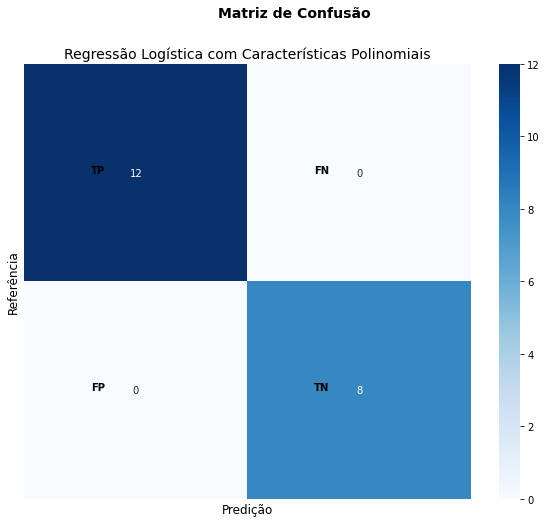

In [ ]:
#Reorganização da matriz confusão para 
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

#Visualização Gráfica da Matriz de Confusão
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Referência', fontsize=12)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

plt.savefig('target/plot1.2.4.png')

In [ ]:
#Relatório da classificação
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Com a combinação de mapeamento de características e sintonização de hiperparâmetros chegou-se a um modelo que acertou todas as classificações previstas nos rótulos. Isso é evidenciado pela matriz de confusão e pelo relatório de classificação apresentados nas células anteriores.

---

Este comportamento, apesar de aparentemente positivo, pode significar sobreajuste do modelo ao conjunto de dados e prejudicar a capacidade de generalização do modelo. Na próxima seção avaliaremos como fica a fronteira de decisão do modelo e em seguida analisar maneiras de lidar com o sobreajuste.

###1.2.5 Esboço da fronteira de decisão

In [ ]:
reg_log_poly

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
theta0 = reg_log_poly.intercept_
theta0

array([0.])

In [ ]:
theta = reg_log_poly.coef_[0]
theta

array([ 0.00000000e+00, -2.86171996e-02, -1.12803418e-02, -2.45914276e-03,
       -3.64102912e-03, -8.99543297e-03, -2.20479191e-05, -6.07317452e-06,
       -3.01353522e-05, -1.02402071e-04, -2.63537100e-07,  3.59850807e-07,
        8.77372089e-07,  2.87927325e-08, -5.30223533e-07, -3.55341339e-09,
        5.51292554e-09,  2.31027494e-08,  3.24095601e-08,  1.34267542e-08,
        8.69235265e-09,  0.00000000e+00,  0.00000000e+00,  3.78111650e-11,
        3.11515073e-10,  3.16951649e-10,  5.89874576e-11,  2.77729247e-12])

In [ ]:
theta.shape

(28,)

In [ ]:
lin = np.linspace(0,25,28)

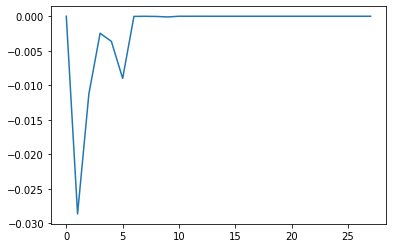

In [ ]:
plt.plot(theta)

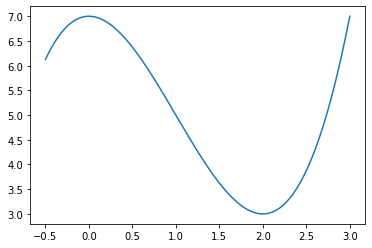

In [ ]:
f1 = lambda x: (x ** 3)-(3 *(x ** 2))+7

# Get 1000 evenly spaced num bers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-0.5,3,500)

# Plot the curve
plt.plot(x, f1(x))
plt.show()

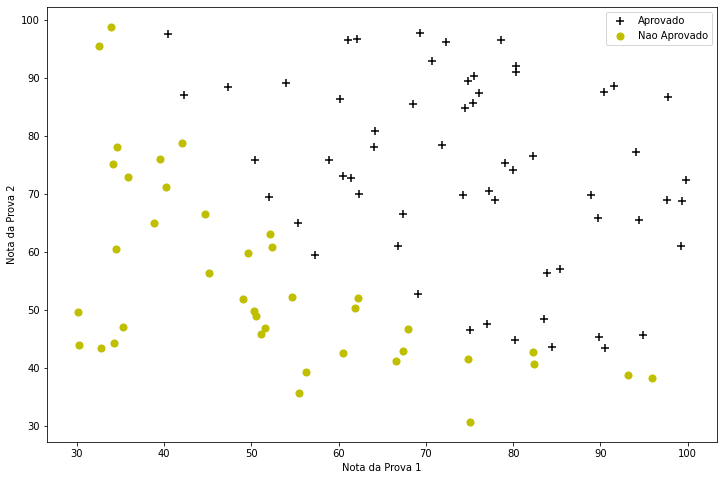

In [ ]:
#%run plotDecisionBoundary.py
#%matplotlib inline

filename='target/plot1.2.5.1.png'
plot(dados, filename)

##1.3 Regularização

#2 Redução de Dimensionalidade

#3 Agrupamento

#4 Detecção de Anomalias

#Referências

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

---

**Algoritmos e conjuntos de dados:**

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modelselection.ipynb

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modeleval_sup.ipynb

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_dtree.ipynb

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_knn.ipynb

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_naivebayes.ipynb
